In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [50]:
#reading the csv file

matches=pd.read_csv('D:/Data Analysis with Python/IPL Data Set/matches.csv')
deliveries=pd.read_csv('D:/Data Analysis with Python/IPL Data Set/deliveries.csv')
print(matches.head())
print(deliveries.tail())

   id  season        city        date                  team1  \
0   1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2   3    2008       Delhi  2008-04-19       Rajasthan Royals   
3   4    2008      Mumbai  2008-04-20         Mumbai Indians   
4   5    2008     Kolkata  2008-04-20        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal         

In [51]:
matches.drop(['umpire3'],axis=1, inplace=True)
deliveries.fillna(0, inplace=True)


In [52]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

In [53]:
matches.columns


Index([u'id', u'season', u'city', u'date', u'team1', u'team2', u'toss_winner',
       u'toss_decision', u'result', u'dl_applied', u'winner', u'win_by_runs',
       u'win_by_wickets', u'player_of_match', u'venue', u'umpire1',
       u'umpire2'],
      dtype='object')

In [54]:
deliveries.columns

Index([u'match_id', u'inning', u'batting_team', u'bowling_team', u'over',
       u'ball', u'batsman', u'non_striker', u'bowler', u'is_super_over',
       u'wide_runs', u'bye_runs', u'legbye_runs', u'noball_runs',
       u'penalty_runs', u'batsman_runs', u'extra_runs', u'total_runs',
       u'player_dismissed', u'dismissal_kind', u'fielder'],
      dtype='object')

In [55]:
print('Total Matches played:' , matches.shape[0])
print ('Total Matches washed away:',matches.city.unique())
print ('Teams:',matches.team1.unique())

('Total Matches played:', 577)
('Total Matches washed away:', array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot', 'Kanpur'], dtype=object))
('Teams:', array(['KKR', 'CSK', 'RR', 'MI', 'DC', 'KXIP', 'RCB', 'DD', 'KTK', 'PW',
       'SRH', 'RPS', 'GL'], dtype=object))


In [56]:
print('Most Man of the Matches:', matches.player_of_match.value_counts().idxmax())


('Most Man of the Matches:', 'CH Gayle')


In [57]:
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

('MI', ': has the highest number of match wins')


In [58]:
matches.describe(include="all")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,577.000000,577.000000,570,577,577,577,577,577,577,577.000000,574,577.000000,577.000000,574,577,577,577
unique,NaN,NaN,30,407,13,13,13,2,3,NaN,13,NaN,NaN,187,35,43,45
top,NaN,NaN,Mumbai,2015-05-02,CSK,RCB,MI,field,normal,NaN,MI,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
freq,NaN,NaN,77,2,77,77,74,315,568,NaN,80,NaN,NaN,17,58,73,54
mean,289.000000,2012.029463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025997,NaN,13.715771,3.363951,NaN,NaN,NaN,NaN
std,166.709828,2.486247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159263,NaN,23.619282,3.416049,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,145.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,289.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN
75%,433.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,20.000000,6.000000,NaN,NaN,NaN,NaN


In [59]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,288.564679,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,432.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,577.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [60]:
df=matches.iloc[(matches['win_by_runs']).idxmax()]
df[['season','team1','team2','winner','win_by_runs']]

season         2016
team1           RCB
team2            GL
winner          RCB
win_by_runs     144
Name: 560, dtype: object

In [61]:
df=matches.iloc[(matches.win_by_wickets).idxmax()]
df[['season','team1','team2','winer','win_by_wickets']]

season            2008
team1               MI
team2               DC
winer              NaN
win_by_wickets      10
Name: 12, dtype: object

In [62]:
print('Total toss decisions in % \n',(matches.toss_decision.value_counts()/len(matches)*100))

('Total toss decisions in % \n', field    54.592721
bat      45.407279
Name: toss_decision, dtype: float64)


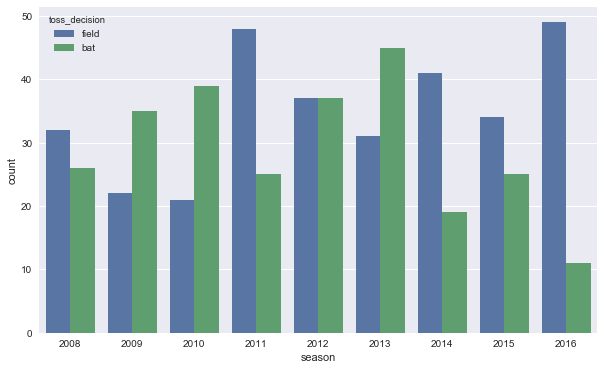

In [63]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()


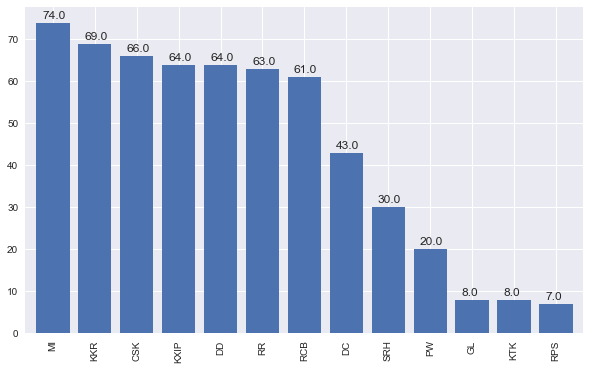

In [64]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()


In [65]:
match_played_byteams=pd.concat([matches['team1'],matches['team2']])
match_played_byteams=match_played_byteams.value_counts().reset_index()
match_played_byteams.columns=['Team','Matches Played']
match_played_byteams['win']=matches['winner'].value_counts().reset_index()['winner']
match_played_byteams.set_index('Team',inplace=True)


trace1= go.Bar(x=match_played_byteams.index,
              y=match_played_byteams['Matches Played'],
              name='Total Matches')

trace2=go.Bar(x=match_played_byteams.index,
             y=match_played_byteams['win'],
             name='Matches won')

data=[trace1,trace2]

layout=go.Layout(barmode='stack')

figure=go.Figure(data=data,layout=layout)
py.iplot(figure,filename='stacked-bar')

#print(match_played_byteams)

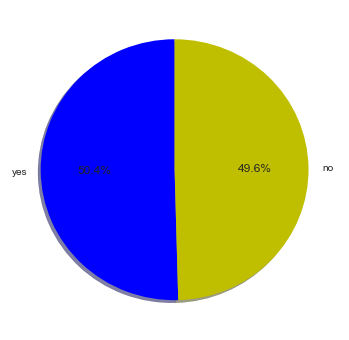

In [66]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','y'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

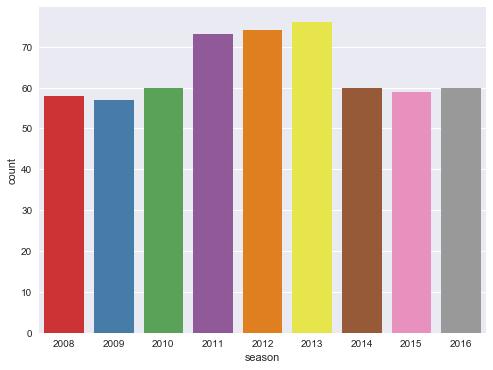

In [67]:
plt.subplots(figsize=(8,6))
sns.countplot(x='season',data=matches,palette='Set1')
sns.plt.show()

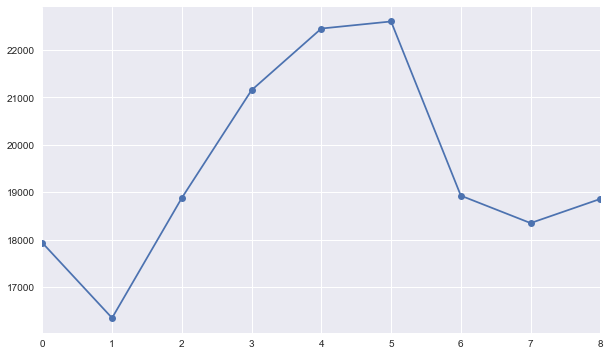

In [68]:
#Runs Scored by Season
plt.subplots(figsize=(10,6))
batsmanScore=matches[['id','season']].merge(deliveries, left_on='id',right_on='match_id',how='left').drop('id',axis=1)
season=batsmanScore.groupby(['season'])['total_runs'].sum().reset_index()
season['total_runs'].plot(marker='o')
plt.show()

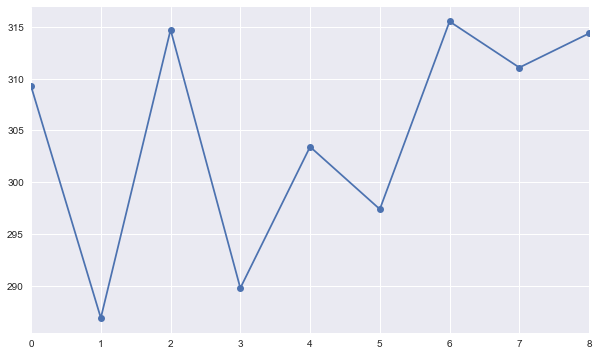

In [69]:
#Average Runs Scored per match in each season

plt.subplots(figsize=(10,6))
matches_average_run_per_season=matches.groupby(['season']).count().id.reset_index()
matches_average_run_per_season.rename(columns={'id':'matches'},inplace=True)
matches_average_run_per_season['total_runs']=season['total_runs']
matches_average_run_per_season['avgrun_per_season']=matches_average_run_per_season['total_runs']/matches_average_run_per_season['matches']
#print(matches_average_run_per_season)
matches_average_run_per_season['avgrun_per_season'].plot(marker='o')
plt.show()


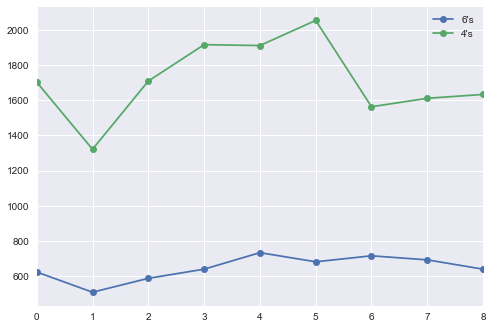

In [70]:
#Sixes and Fours Across Season
Season_boundaries=batsmanScore.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmanScore.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries.rename(columns={'batsman_runs_x':"6's",'batsman_runs_y':"4's"},inplace=1)
Season_boundaries[["6's","4's"]].plot(marker='o')
plt.show()
#print(Season_boundaries)

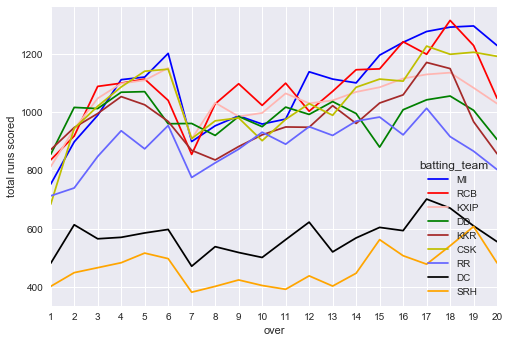

In [71]:
#Runs per Over by Team Across the Season

runs_per_over=deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(match_played_byteams[match_played_byteams['Matches Played']>50].index)].plot(color=["b","r","#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500'])
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
#fig=plt.gcf()
#fig.set_size_inches(10,8)
plt.show()

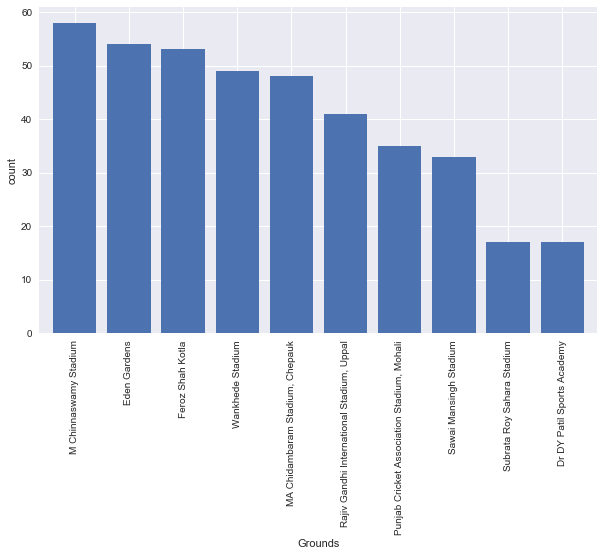

In [72]:
#Favorite Ground
plt.subplots(figsize=(10,6))
ax=matches['venue'].value_counts().head(10).plot.bar(width=.8)#,color=["#999966", "#8585ad", "#c4ff4d", "#ffad33"])
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

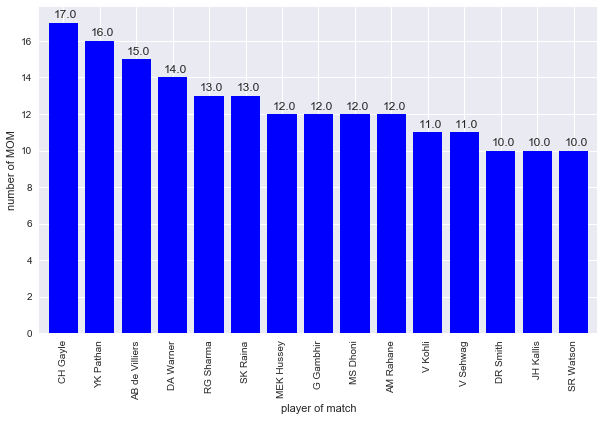

In [73]:
#Maximum MAn Of the MActhes


plt.subplots(figsize=(10,6))
ax=matches['player_of_match'].value_counts().head(15).plot.bar(width=.8,color='B')
ax.set_xlabel('player of match')
ax.set_ylabel('number of MOM')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
plt.show()

In [74]:
#Winners By Year and PLayer of the Matche
for i in range(2008,2017):
    df=(matches[matches['season']==i]).iloc[-1]
    print(df[[1,10,13]])
    

season                  2008
winner                    RR
player_of_match    YK Pathan
Name: 57, dtype: object
season                 2009
winner                   DC
player_of_match    A Kumble
Name: 114, dtype: object
season                 2010
winner                  CSK
player_of_match    SK Raina
Name: 174, dtype: object
season                2011
winner                 CSK
player_of_match    M Vijay
Name: 247, dtype: object
season                 2012
winner                  KKR
player_of_match    MS Bisla
Name: 321, dtype: object
season                   2013
winner                     MI
player_of_match    KA Pollard
Name: 397, dtype: object
season                  2014
winner                   KKR
player_of_match    MK Pandey
Name: 457, dtype: object
season                  2015
winner                    MI
player_of_match    RG Sharma
Name: 516, dtype: object
season                    2016
winner                     SRH
player_of_match    BCJ Cutting
Name: 576, dtype: object

In [75]:
#Super Over

print('Total Matches decided in Super Over',matches[matches['result']=='tie'].id.nunique())

('Total Matches decided in Super Over', 6)


In [76]:
#Teams who has never played super over

teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=deliveries[deliveries['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))





('Teams who haven"t ever played a super over are:', ['RPS', 'PW', 'MI', 'DC', 'KTK', 'GL'])


In [77]:
#Teams which has not played super over yet

teams=matches[matches['result']!='tie']
Teams_List=pd.concat([teams['team1'],teams['team2']])
superTeams=matches[matches['result']=='tie']
sT=pd.concat([superTeams['team1'],superTeams['team2']])
sT=sT.value_counts().reset_index()
Teams_List=Teams_List.value_counts().reset_index()
print(list(set(Teams_List['index'])-set(sT['index'])))

['RPS', 'PW', 'MI', 'DC', 'KTK', 'GL']


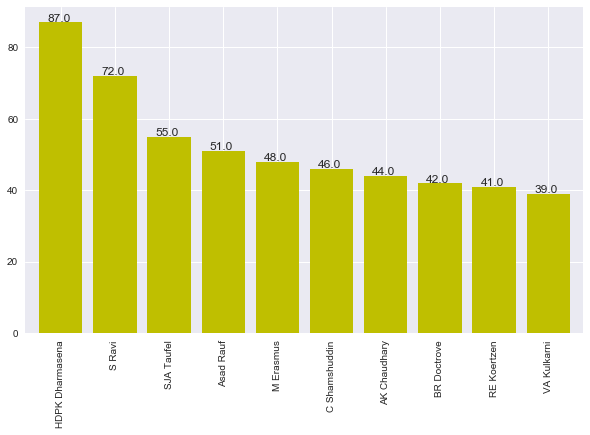

In [78]:
#Favorite Umpire
plt.subplots(figsize=(10,6))
umpire=pd.concat([matches['umpire1'],matches['umpire2']])
ax=umpire.value_counts().head(10).plot.bar(width=0.8,color='Y')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
plt.show()

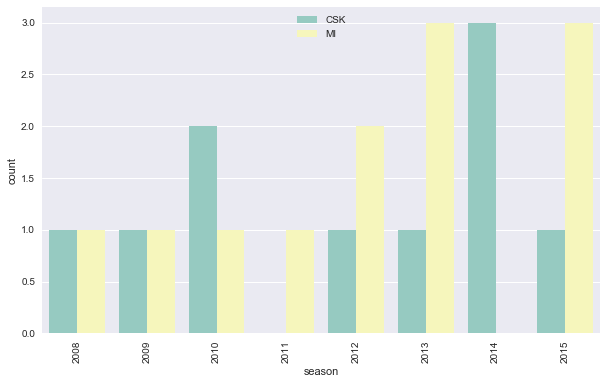

In [79]:
def team_Stats(team1,team2):
    games=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner', data=games, palette='Set3')
    plt.xticks(rotation='vertical')
    leg=plt.legend(loc='upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team_Stats('CSK','MI')

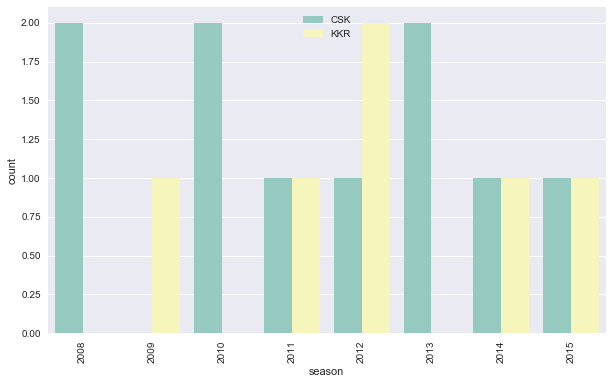

In [80]:
team_Stats('KKR','CSK')

In [81]:
#Match Won against Every Team

def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask=(((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
        
comparator('CSK')

        MI  CSK
winner  12   10
        CSK  KKR
winner   10    6
        CSK  RCB
winner   12    7
        CSK  DC
winner    6   4
        CSK  RR
winner   11   6
        CSK  DD
winner   11   5
Empty DataFrame
Columns: []
Index: [winner]
        CSK  KXIP
winner   10     7
        CSK  SRH
winner    4    2
Empty DataFrame
Columns: []
Index: [winner]
        KTK  CSK
winner    1    1
        CSK  PW
winner    4   2


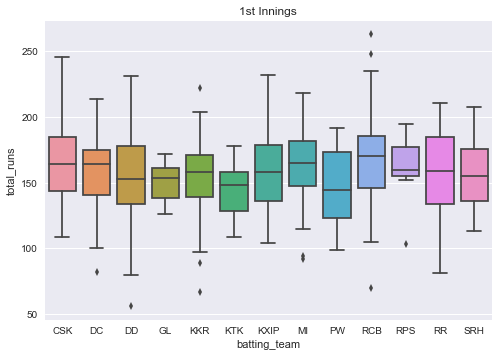

In [82]:
#Score Distribution Of Every Team By Innings
xyz=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_innings=xyz[xyz['inning']==1]
score_2_innings=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_innings).set_title('1st Innings')
plt.show()


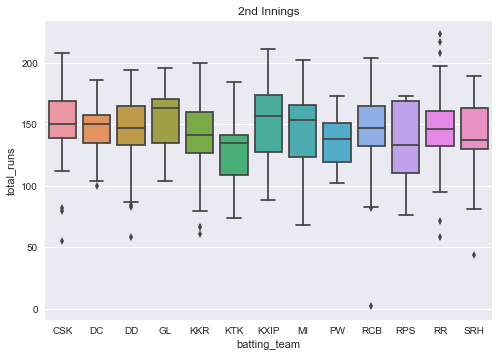

In [83]:
sns.boxplot(x='batting_team',y='total_runs',data=score_2_innings).set_title('2nd Innings')
plt.show()

In [84]:
#200 + Scores

high_score=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score=high_score[high_score['total_runs']>=200]
high_score.nlargest(15,'total_runs')
#print(high_score)

,match_id,inning,batting_team,bowling_team,total_runs
709,352,1,RCB,PW,263
1130,561,1,RCB,GL,248
296,147,1,CSK,RR,246
2,2,1,CSK,KXIP,240
1014,503,1,RCB,MI,235
476,237,1,KXIP,RCB,232
402,200,1,DD,KXIP,231
861,427,1,KXIP,CSK,231
1050,521,1,RCB,SRH,227
921,457,1,KXIP,CSK,226


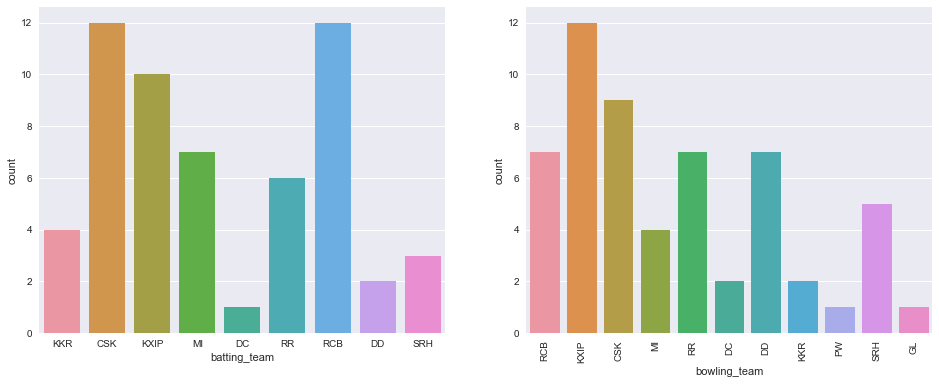

In [85]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(high_score['batting_team'],ax=ax[0])
sns.countplot(high_score['bowling_team'],ax=ax[1])
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

In [86]:
#Team Who has not scored 200 runs in an inning
print("Team who have'nt scored 200 runs", list(set(teams['team2'])-set(high_score['batting_team'])))
print("Team who has not conceded 200 runs", list(set(teams['team2'])-set(high_score['bowling_team'])))

("Team who have'nt scored 200 runs", ['RPS', 'GL', 'PW', 'KTK'])
('Team who has not conceded 200 runs', ['RPS', 'KTK'])


In [87]:
#Teams who scored 200 plus against opponents:

high=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                3
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                1
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KXIP              1
                    RCB               1
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

In [88]:
high_scores=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning','total_runs']],on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_scored_chased']=1
high_scores1['is_scored_chased']=np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'],'yes','no')
high_scores1.head(15)





,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_scored_chased
0,1,1,KKR,RCB,222,2,82,no
1,2,1,CSK,KXIP,240,2,207,no
7,8,1,CSK,MI,208,2,202,no
8,9,1,DC,RR,214,2,217,yes
32,33,1,KKR,DC,204,2,181,no
37,38,1,KXIP,RR,221,2,180,no
50,51,1,RR,CSK,211,2,201,no
85,86,1,RR,KXIP,211,2,133,no
116,117,1,MI,RR,212,2,208,no
121,122,1,KXIP,RCB,203,2,204,yes


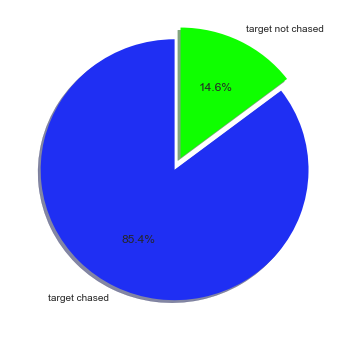

In [89]:
#Chances of Chasing 200+ target
silces=high_scores1['is_scored_chased'].value_counts()
list(slices)
labels=['target chased','target not chased']
plt.pie(silces,labels=labels,colors=['#1f2ff3', '#0fff00'], startangle=90, shadow=True, explode=(0,0.1), autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Batsman Comparator
Function has been created where two batsman are compared with respective stats like run's and strike rate.

In [90]:
balls=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.columns=[['batsman','ball_x','ball_y']]
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index()
fours=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.columns=[['batsman','balls_faced','runs','strike_rate',"6's","4's",'Team','Highest_score']]
balls.head(10)

,batsman,balls_faced,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,15,16,DC,10
1,A Ashish Reddy,196,280,142.857143,15,16,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,0,7,KKR,24
4,A Flintoff,57,62,108.771930,2,5,CSK,24
5,A Kumble,49,35,71.428571,0,3,RCB,8
6,A Mishra,326,291,89.263804,3,25,DC,25
7,A Mishra,326,291,89.263804,3,25,DD,31
8,A Mishra,326,291,89.263804,3,25,SRH,30
9,A Mithun,26,34,130.769231,1,4,RCB,11


In [100]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(plt.scatter,stat1,stat2,alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    plt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    plt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,fontsize=10,weight='bold',color='#f46d43')
    plt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    plt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2,fontsize=10,weight='bold',color='#ff58fd')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.title('Batsman Comparator',size=25)
    plt.show()
    

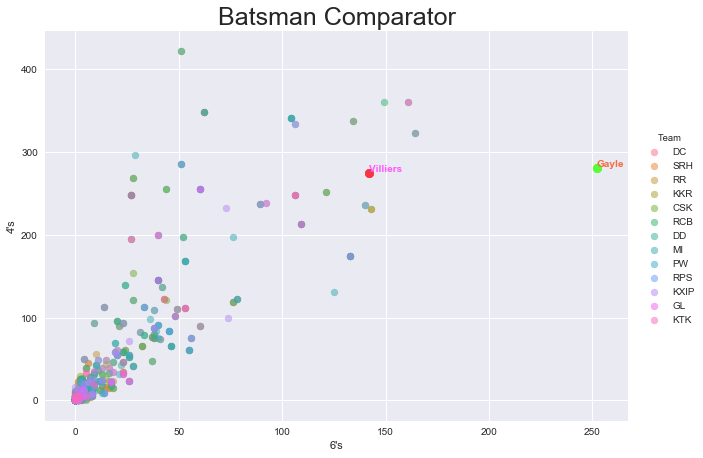

In [101]:
batsman_comparator("6's","4's",'Gayle','Villiers') 

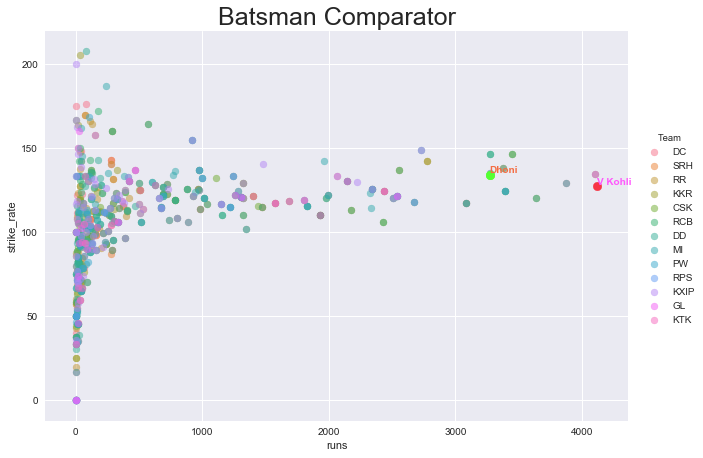

In [102]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

# Top Batsmen
### Top 10 Batsman

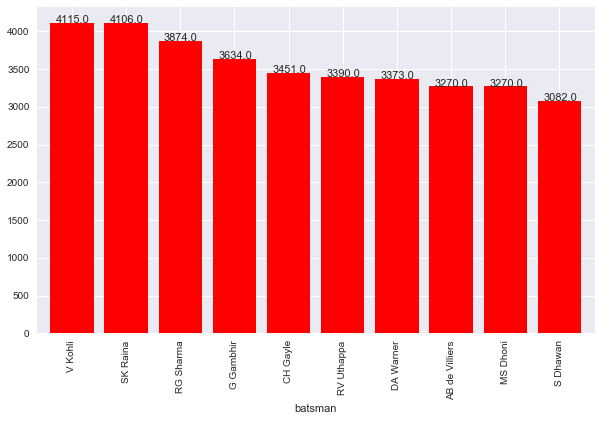

In [105]:
plt.subplots(figsize=(10,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color='R')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.1),fontsize=11)
plt.show()

### Top Batsman's with 1's, 2's, 3's, 4's

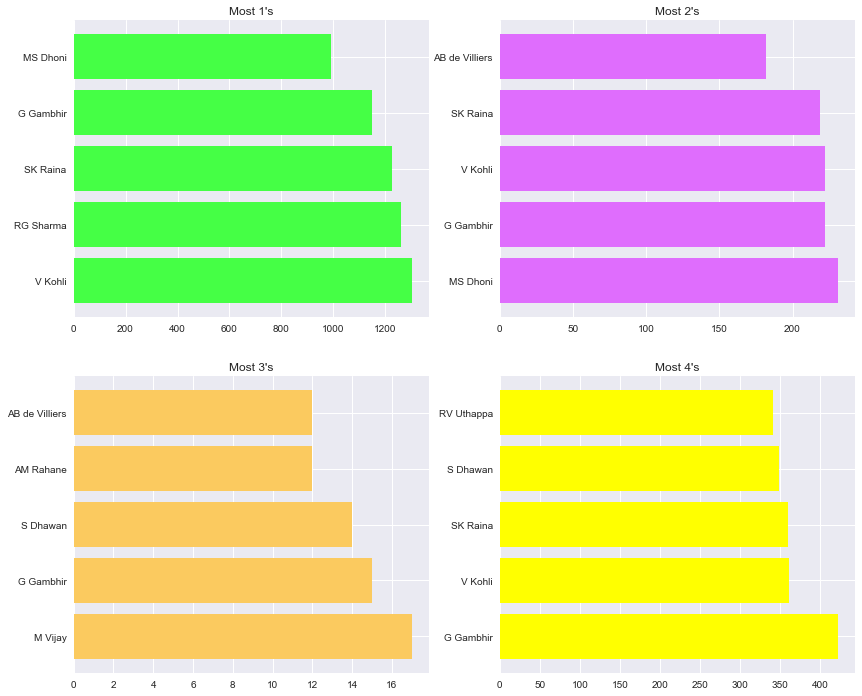

In [108]:
toppers=deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(14,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[3].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 3's")
ax[1,0].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 4's")
ax[1,1].set_ylabel('')
plt.show()

### Top Individual Score

In [110]:
top_score=deliveries.groupby(['match_id','batsman','batting_team'])["batsman_runs"].sum().reset_index()
top_score.sort_values('batsman_runs',ascending=False).head(10)
top_score.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
5302,352,CH Gayle,RCB,175
2,1,BB McCullum,KKR,158
7528,503,AB de Villiers,RCB,133
8359,561,AB de Villiers,RCB,129
4687,313,CH Gayle,RCB,128
2237,147,M Vijay,CSK,127
6854,457,V Sehwag,KXIP,122
2788,184,PC Valthaty,KXIP,120
3325,220,V Sehwag,DD,119
119,9,A Symonds,DC,117


### Individual Score By Top Batsman each Innings

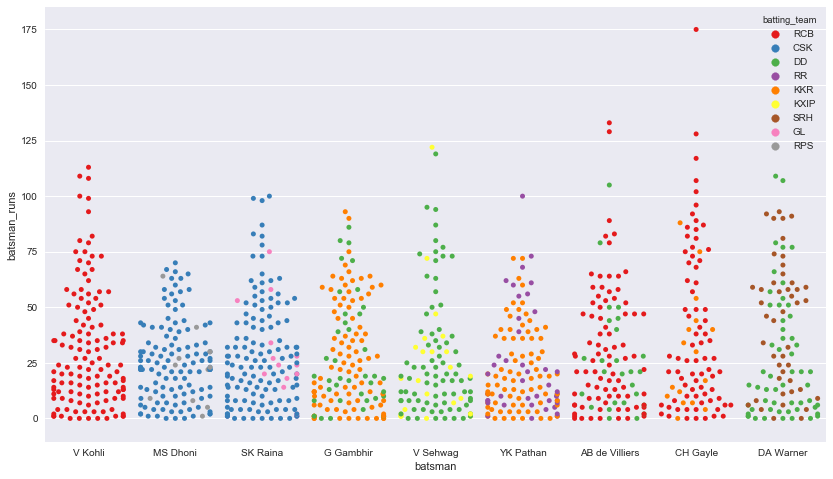

In [112]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner','V Sehwag']
score=deliveries.groupby(['match_id','batsman','batting_team'])["batsman_runs"].sum().reset_index()
score=score[top_score['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=score,hue="batting_team",palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()


### Runs Scored By Batsman Across Season 

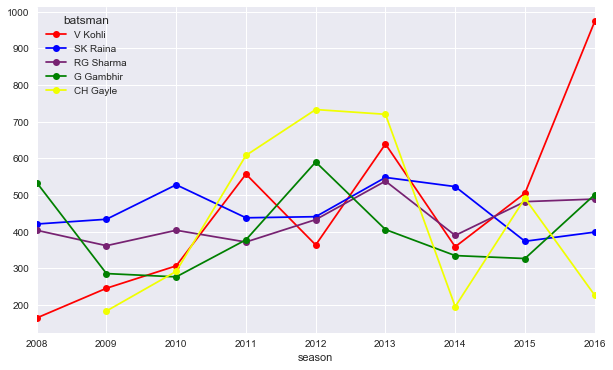

In [113]:
batsman_scored=batsmanScore.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
batsman_scored=batsman_scored.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
batsman_scored['Total']=batsman_scored.sum(axis=1)
batsman_scored=batsman_scored.sort_values(by='Total',ascending=False)[:5]
batsman_scored.drop('Total',axis=1,inplace=True)
batsman_scored.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Frequency Of Score

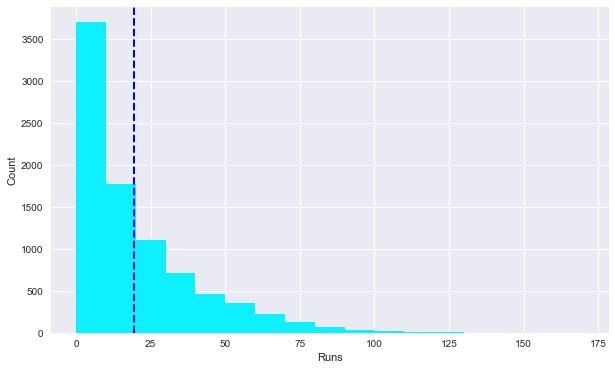

In [114]:
plt.subplots(figsize=(10,6))
bins=range(0,180,10)
plt.hist(top_score["batsman_runs"],bins,histtype="bar",rwidth=1.2,color="#0ff0ff")
plt.xlabel('Runs')
plt.ylabel('Count')
plt.axvline(top_score["batsman_runs"].mean(),color='b',linestyle='dashed',linewidth=2)
plt.plot()
plt.show()